## Entregable 1: 
### Preprocesamiento de datos multivariados o de una serie temporal
#### Manolo Ramírez Pintor - A01706155

1. #### Realiza un análisis exploratorio de las variables:

*   * **Seleccion y limpieza de datos**

In [75]:
# Importamos las librerías necesarias para trabajar:
import pandas as pd
import numpy as np
# Ignorar warnings de pandas
pd.options.mode.chained_assignment = None  # default='warn'
# Ignorar warnings en general
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter
# Librerias para modelado, regresiones y obtención de resultados:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Librerías de graficado
import matplotlib.pyplot as plt
# Mantener gráficos en el notebook:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [76]:
# Leemmos los datasets y quitamos columnas que no necesitamos
us2022 = pd.read_csv('datasets/us2022q2a.csv')
usfirms = pd.read_csv('datasets/usfirms2022.csv')
us_merged = us2022.merge(usfirms, left_on='firm', right_on='Ticker')

In [77]:
# Selecciono únicamente los sectores Retail Trade y Wholesale Trade
us_merged = us_merged.loc[us_merged['Sector NAICS\nlevel 1'].isin(['Retail Trade', 'Wholesale Trade'])]
# us_merged

In [78]:
us_merged['R'] = np.log(us_merged.groupby(['firm'])['adjprice'].shift(-1)) - np.log(us_merged.groupby(['firm'])['adjprice'].shift(3))

In [79]:
df_masked = us_merged[us_merged['q'] == '2022q1']

In [80]:
df_masked = df_masked.drop(['extraincome', 'shortdebt', 'longdebt', 'stockholderequity', 
                'Ticker', 'Name', 'Class', 'Exchange / Src', 'Sector\nEconomatica', 
                'Sector NAICS\nlast available', 'partind', 'N', 'Country\nof Origin', 
                'Type of Asset', 'fiscalmonth', 'year', 'cto'], axis=1)
df_masked

,firm,q,revenue,cogs,sgae,otheropexp,finexp,incometax,totalassets,totalliabilities,adjprice,originalprice,sharesoutstanding,Sector NAICS\nlevel 1,R
718,AAP,2022q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.158154,206.96,61097.579,Retail Trade,-0.144831
1168,ABC,2022q1,57719448.0,55484368.0,1378528.0,76395.0,52916.0,172944.0,57308153.0,56402088.0,153.761909,154.71,209137.429,Wholesale Trade,0.225304
1435,ABG,2022q1,3911800.0,3119800.0,473900.0,-2700.0,40200.0,76000.0,7860100.0,5677600.0,160.200000,160.20,23187.817,Retail Trade,-0.011916
3142,ACI,2022q1,17383500.0,12399200.0,4321700.0,-1700.0,108000.0,148700.0,28123000.0,25098400.0,32.976197,33.25,483118.147,Retail Trade,0.323732
5932,AE,2022q1,774245.0,0.0,766097.0,0.0,90.0,1968.0,470117.0,304596.0,38.241532,38.49,4367.866,Wholesale Trade,0.181133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315984,WSM,2022q1,2501029.0,1375792.0,600665.0,0.0,-89.0,121720.0,4625620.0,2961413.0,143.394496,145.00,71558.874,Retail Trade,-0.346125
316074,WSO,2022q1,1523570.0,1073212.0,283354.0,-4045.0,558.0,35601.0,3473889.0,1393174.0,299.661871,304.64,38772.956,Wholesale Trade,-0.154603
316344,WSTG,2022q1,71319.0,59338.0,8606.0,0.0,10.0,796.0,188770.0,134861.0,34.197852,34.55,4450.062,Wholesale Trade,0.304832
322284,ZEUS,2022q1,696333.0,555107.0,88104.0,0.0,1998.0,13816.0,1043703.0,580917.0,38.364750,38.46,11123.700,Wholesale Trade,-0.124839


In [81]:
# Obtenemos calculos de variables en base a las fórmulas que hemos visto anteriormente

# Get the Ebit and store it on 'Ebit' var:
df_masked['EBIT'] = df_masked['revenue'] - df_masked['cogs'] - df_masked['sgae'] - df_masked['otheropexp']
# Get the Net Income and store it on 'Net income' var:
df_masked['NetIncome'] = df_masked['EBIT'] - df_masked['incometax'] - df_masked['finexp']
# Get the EPS and store it on 'EPS' var:
df_masked['EPS'] = df_masked['NetIncome'] / df_masked['sharesoutstanding']

# Get Firm sizes and store them on a 'Book value' var:
df_masked['Book'] = df_masked['totalassets'] - df_masked['totalliabilities']
# Get Market values and store them on a 'Market value' var:
df_masked['Market'] = df_masked['originalprice'] * df_masked['sharesoutstanding']
# Get Firm sizes ratio (Book to Market ratio) values and store them on a 'Market value' var:
df_masked['BTMR'] = df_masked['Book'] / df_masked['Market']

# Get EPSP and store it on a 'EPSP' var:
df_masked['EPSP'] = df_masked['EPS'] / df_masked['originalprice']
# Get the Operating Profit Margin and store it on 'OPM' var:
df_masked['OPM'] = df_masked['EBIT'] / df_masked['revenue']

In [82]:
# We sort the values for Market Value
df_masked = df_masked.sort_values(by = 'Market')
# The index is gets resetted 
df_masked = df_masked.reset_index()
df_masked = df_masked.drop(['index'], axis = 1)


# We make a new column for small and medium values of our sorted and masked data
df_masked["small"] = df_masked.index <= len(df_masked) / 3
df_masked["small"] = df_masked["small"].astype(int)

df_masked["medium"] = (df_masked.index <= (2 * len (df_masked)/3)) & (df_masked.index > (len(df_masked) / 3))
df_masked["medium"] = df_masked["medium"].astype(int)

In [83]:
# With a dataset copy, we make a drop of the null values.
# A filter or remasking could work but it's the exact same thing at the end.
df_process = df_masked[['R', 'EPSP', 'OPM', 'BTMR', 'small', 'medium']]
df_process = df_process.dropna()

# x matrix
x = df_process[['EPSP', 'OPM', 'BTMR', 'small', 'medium']]
# y matrix
y = df_process['R']
# xy matrix
xy = df_process[['EPSP', 'OPM', 'BTMR', 'small', 'medium', 'R']]
# aux matrix
aux = x


-    - Calcula matriz de varianza y covarianza, así como matriz de correlación de las variables independientes y la dependiente. Explicar qué es la varianza, covarianza y correlación. Interpreta la matriz de correlación. Tiene que utilizar álgebra matricial y corroborar resultados con funciones de Python.



Primero, calcularemos la matriz de covarianza utilizando una función totalmente manual. Nos basaremos [en esta fórmula](https://docs.google.com/viewer?a=v&pid=sites&srcid=ZWdhZGVyemMubmV0fGZ6MzAzMHxneDozOTI1ODBmMGU2YTMzZGM).

In [84]:
# We calculate que covariance matrix using a manual function:
# Refefence: https://docs.google.com/viewer?a=v&pid=sites&srcid=ZWdhZGVyemMubmV0fGZ6MzAzMHxneDozOTI1ODBmMGU2YTMzZGM1 last page and formula.
def covar_x(x):
    dst_lenght = len(x)
    uno = np.ones((dst_lenght,1))
    f_stp = np.matmul(x.T, x); s_stp = np.matmul(x.T, uno); t_stp = s_stp.T
    covarianza = (f_stp - (1/dst_lenght) * (np.matmul(s_stp, t_stp))) / (dst_lenght - 1)
    return covarianza

covar_x(x)

,0,1,2,3,4
EPSP,0.010281,0.010747,-0.002510,-0.011957,0.006929
OPM,0.010747,0.038002,-0.000704,-0.021568,0.005114
BTMR,-0.002510,-0.000704,0.183353,0.073453,0.005851
small,-0.011957,-0.021568,0.073453,0.219000,-0.110980
medium,0.006929,0.005114,0.005851,-0.110980,0.226715


In [85]:
# With pandas, we will check if the manual correlation function was right
x.cov()

,EPSP,OPM,BTMR,small,medium
EPSP,0.010281,0.010747,-0.002510,-0.011957,0.006929
OPM,0.010747,0.038002,-0.000704,-0.021568,0.005114
BTMR,-0.002510,-0.000704,0.183353,0.073453,0.005851
small,-0.011957,-0.021568,0.073453,0.219000,-0.110980
medium,0.006929,0.005114,0.005851,-0.110980,0.226715


In [86]:
# Now we get the variance from the matrix that we got.
x.var()

EPSP      0.010281
OPM       0.038002
BTMR      0.183353
small     0.219000
medium    0.226715
dtype: float64

In [87]:
# Con pandas vamos a ver si está bien la función de covarianza manual
x.corr()

,EPSP,OPM,BTMR,small,medium
EPSP,1.000000,0.543709,-0.057806,-0.251986,0.143513
OPM,0.543709,1.000000,-0.008431,-0.236421,0.055093
BTMR,-0.057806,-0.008431,1.000000,0.366559,0.028695
small,-0.251986,-0.236421,0.366559,1.000000,-0.498059
medium,0.143513,0.055093,0.028695,-0.498059,1.000000


* * A continuación vamos a revisar la matriz de correlación respecto a las variables dependientes e independientes:

In [88]:
# We calculate the correlation maxtrix with this formula:
# Corrrelation(X,y) = Covariance(X,y)/dev_std(x)*dev_std(y)
def corrXY(xy):
    N = len(xy)
    uno = np.ones((N,1))
    f_stp = np.matmul(xy.T, xy); s_stp = np.matmul(xy.T, uno); t_stp = s_stp.T
    covarxy = (f_stp - (1/N) * (np.matmul(s_stp, t_stp))) / (N-1)
    desv_xy = np.diag(covarxy)**0.5

    desv = [[0 for y in range(len(desv_xy))] 
              for x in range(len(desv_xy))]
    
    for i in range(len(desv_xy)):
        for j in range(len(desv_xy)):
            desv[i][j] = desv_xy[i] * desv_xy[j]

    desv = np.array([np.array(s) for s in desv])

    return covarxy / desv

# We call our function and execute it with our data
corrXY(xy)

,0,1,2,3,4,5
EPSP,1.000000,0.543709,-0.057806,-0.251986,0.143513,0.475231
OPM,0.543709,1.000000,-0.008431,-0.236421,0.055093,0.565677
BTMR,-0.057806,-0.008431,1.000000,0.366559,0.028695,-0.072760
small,-0.251986,-0.236421,0.366559,1.000000,-0.498059,-0.263924
medium,0.143513,0.055093,0.028695,-0.498059,1.000000,0.015611
R,0.475231,0.565677,-0.072760,-0.263924,0.015611,1.000000


In [89]:
# To check if our function is correct, we will compare using Pandas:
xy.corr()

,EPSP,OPM,BTMR,small,medium,R
EPSP,1.000000,0.543709,-0.057806,-0.251986,0.143513,0.475231
OPM,0.543709,1.000000,-0.008431,-0.236421,0.055093,0.565677
BTMR,-0.057806,-0.008431,1.000000,0.366559,0.028695,-0.072760
small,-0.251986,-0.236421,0.366559,1.000000,-0.498059,-0.263924
medium,0.143513,0.055093,0.028695,-0.498059,1.000000,0.015611
R,0.475231,0.565677,-0.072760,-0.263924,0.015611,1.000000


- 
   - Corre pruebas estadísticas para detectar outliers y leverage points. Tiene que utilizar álgebra matricial para las pruebas y explicar claramente cómo funcionan las pruebas. Puede utilizar funciones de Python para corroborar resultados.

* * Ahora, haremos la detección de outliers y leverage points a continuación:   
    
    Tenemos entendido que...
    * Los outliers nos indican datos que no siguen una tendencia
    * Los leverages nos indican si los datos presentan apalancamiento alto si tienen valores de predicción altos.   

    Teniendo esto en cuenta, primero usaremos un modelo sin ignorar los puntos anteriores.

In [90]:
# Creation of a model to get information about our outliers and leverages
model = sm.OLS(y, sm.add_constant(x)).fit()
# Check stats of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     26.30
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           1.24e-20
Time:                        00:03:37   Log-Likelihood:                -199.70
No. Observations:                 218   AIC:                             411.4
Df Residuals:                     212   BIC:                             431.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3689      0.078     -4.734      0.000      -0.523      -0.215
EPSP           1.7382      0.496      3.502      0.001       0.760       2.717
OPM            1.6079      0.259      6.203      0.000       1.097       2.119
BTMR           0.0243      0.109      0.223      0.824      -0.191       0.239
small         -0.2963      0.119     -2.496      0.013      -0.530      -0.062
medium        -0.2098      0.105     -1.992      0.048      -0.417      -0.002
==============================================================================
Omnibus:                       19.111   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.230
Skew:                          -0.668   Prob(JB):                     1.49e-05
Kurtosis:                       3.812   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ahora, antes de pasar a otra cosa, obtendremos los leverage points existentes. A través de la función de hat matrix, obtendremos la diagonal de datos que nos interesa conocer a través de la siguiente fórmula.   

``H = x(x'*x)^-1 * x'``

Cuando obtengamos la diagonal y los leverages, podremos visualizar los datos.

In [91]:
h = x.dot(np.linalg.inv(x.T.dot(x)).dot(x.T))
h

,0,1,2,3,4,5,6,7,8,9,...,208,209,210,211,212,213,214,215,216,217
0,0.015891,0.023336,0.014557,0.015698,0.017246,0.017639,0.015294,0.013231,0.013084,0.018534,...,-0.000603,-0.000015,-0.000341,-0.000674,-0.003531,0.000426,-0.000434,0.000311,-0.001366,-0.000469
1,0.023336,0.078291,0.039960,0.025819,0.029678,0.033095,0.011216,0.003984,0.002418,0.045146,...,-0.003841,0.000554,-0.002348,-0.004869,-0.023049,0.002755,-0.002804,0.002382,-0.009055,-0.002849
2,0.014557,0.039960,0.060176,0.021278,0.014877,0.011638,-0.000549,0.006539,0.005092,0.010813,...,0.000070,0.002491,0.000126,-0.001441,-0.006131,0.001705,-0.000367,0.002761,-0.002413,-0.000116
3,0.015698,0.025819,0.021278,0.016524,0.016842,0.016837,0.012924,0.012226,0.011887,0.017827,...,-0.000530,0.000323,-0.000297,-0.000805,-0.003933,0.000592,-0.000435,0.000636,-0.001533,-0.000427
4,0.017246,0.029678,0.014877,0.016842,0.026936,0.011975,0.020669,0.014294,0.013948,-0.026473,...,0.001718,0.003571,0.002157,0.000738,-0.005317,0.003490,0.000259,0.004829,-0.001429,0.000115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.000426,0.002755,0.001705,0.000592,0.003490,-0.002415,0.001444,0.000190,0.000073,-0.017278,...,0.000909,0.001435,0.000963,0.000519,-0.000681,0.001186,0.000273,0.001776,-0.000029,0.000243
227,-0.000434,-0.002804,-0.000367,-0.000435,0.000259,-0.002140,0.000495,0.000624,0.000663,-0.008290,...,0.000580,0.000518,0.000502,0.000483,0.001169,0.000273,0.000276,0.000525,0.000545,0.000272
228,0.000311,0.002382,0.002761,0.000636,0.004829,-0.004559,0.002001,0.000512,0.000357,-0.028145,...,0.001566,0.002269,0.001592,0.000964,-0.000298,0.001776,0.000525,0.002733,0.000253,0.000487
229,-0.001366,-0.009055,-0.002413,-0.001533,-0.001429,-0.003992,0.000549,0.001557,0.001739,-0.010805,...,0.000935,0.000441,0.000705,0.000938,0.003451,-0.000029,0.000545,0.000253,0.001432,0.000550


Ahora visualizaremos los datos que obtuvimos con la función de Hat Matrix.

Text(0.5, 0, 'R')

Text(0, 0.5, 'Leverage')

Text(0.5, 1.0, 'R vs Leverage')

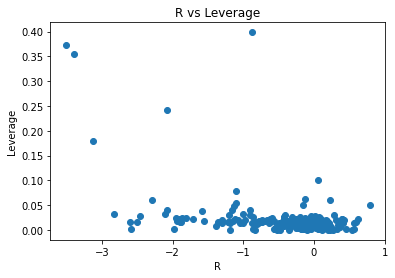

In [92]:
# Obtenemos la diagonal con numpy
diag = np.diag(h)

# Antes de poder graficarlo, lo haremos un dataframe de Pandas
lvrg = pd.DataFrame(diag)

# Ahora la graficamos contra la matriz de 'y' o ('R')
plt.scatter(y, lvrg)
plt.xlabel('R')
plt.ylabel('Leverage')
plt.title('R vs Leverage')

Visualmente, podemos observar que tenemos una gran cantidad de datos concentradas entre -1 y 0 en el eje X (R), por otro lado, en Leverage podemos observar que la gran cantidad de los datos está concentrada entre 0.01 y 0.05.   

También podemos ver que hay puntos dispersos en valores alejados a los mencionados sobre leverage, así que para entender mejor lo que está pasando, crearé una descripción de los datos usando Pandas.

In [93]:
# Hacemos el describe de nuestra diagnonal (leverage)
lvrg.describe()

,0
count,218.000000
mean,0.022936
std,0.047714
min,0.000078
25%,0.007168
50%,0.014988
75%,0.020713
max,0.398589


Ahora viendo la descripción de los datos del leverage, podemos ver que existen leverage points. Ahora debemos tomar la decisión de deshacernos de estos, para ello podemos tomar la regla que dice que 2(K+1)/N.

La regla indica que...
1. K = Número de variables disponibles
2. N = Número de observaciones

Aplicaremos la regla descrita para ver qué datos no deben ser considerados leverage points.

In [94]:
K = len(x.axes[1]) # Tamaño de nuestras variables
N = len(x) # Número de observaciones
not_leverage = 2*(K+1)/N
not_leverage

0.05504587155963303

Con este resultado de ``0.55045``, podemos definir que los datos menores a ese valor no deben ser considerados leverage points.   

Ahora pasemos con los Outliers...   
Para esto de los Outliers, podemos saber cuáles son a través de los métodos de ``Cook's Distance`` y ``Standarized Residuals.``   

Primero probaremos con Cook's Distance.

In [95]:
# Obtendremos la influencia de la instancia a partir del modelo generado.
inf_inst = model.get_influence()
cooks, p = inf_inst.cooks_distance
cooks = pd.DataFrame(cooks)

In [96]:
# Ya que tenemos la información, vamos a describirla con Pandas
cooks.describe()

,0
count,2.180000e+02
mean,1.247367e-02
std,6.825905e-02
min,4.457407e-08
25%,2.803642e-04
50%,1.106476e-03
75%,3.808713e-03
max,7.705540e-01


Ya que usamos Cook's Distance, podemos conocer con certeza cuáles son los outliers dentro de nuestros datos. Para conocer el dato que queremos conocer, utilizamos la fórmula ``outlier = avg*3``, donde avg es el promedio que obtuvimos de Cook's Distance.

En este caso, quedaría de (1.2473)*3. 🙂

Ahora intentaremos calcular los Outliers con el método de Standarized Residuals:

In [97]:
# Usaremos la influencia de la instancia que tenemos cargada en la RAM.
# Luego obtendremos el Standarized Residual dentro de un Dataframe de Pandas.
std_res = inf_inst.resid_studentized_internal
std_res = pd.DataFrame(std_res)

In [98]:
# Ya que tenemos la información, vamos a describirla con Pandas
std_res.describe()

,0
count,218.000000
mean,0.001788
std,1.016769
min,-3.270458
25%,-0.577329
50%,0.210026
75%,0.685390
max,2.915081


Ya que usamos los Standarized Residuals, podemos conocer los outliers. En este caso, se indica que debemos tomar un valor sin signo o absoluto de ``3`` para seleccionar los outliers y no tomarlos en cuenta.   

Ahora, obtendremos todos los outliers y leverage points basado en el análisis que acabamos de realizar.   

**Outliers:**

In [99]:
# Obteniendo los outliers a través de Cook's:
cooks_condition = (abs(cooks[0]) > cooks[0].mean()*3)
cooks[cooks_condition]; ol1 = cooks[cooks_condition]

,0
9,0.063197
10,0.490050
14,0.255722
22,0.060237
47,0.356304
59,0.770554
73,0.050042


In [100]:
# Obteniendo los outliers a través de Standarized Residuals:
std_res_condition = (abs(std_res[0]) >= 3)
std_res[std_res_condition]; ol2 = std_res[std_res_condition]

,0
73,-3.040503
190,-3.270458


**Leverage Points:**

In [101]:
lvrg_condition = abs(lvrg[0] > (not_leverage))
lvrg[lvrg_condition]; lvrg_pts = lvrg[lvrg_condition]

,0
1,0.078291
2,0.060176
9,0.354200
10,0.241426
14,0.179934
29,0.061765
43,0.061028
47,0.372666
59,0.398589
78,0.100670


Ahora, crearemos un merge de los outliers y los leverages con tal de tener los valores listos para eliminar.   

En mi caso tomaré los de Cooks porque me dan los valores que busco eliminar como tal. Los standard residuals no cumplen para realizar la eliminación al tener valores que no coinciden con la condición aplicada para los leverages.

In [102]:
# Creando merge de los outliers y leverages
out_lvrg_inf = pd.merge(lvrg_pts, ol1, right_index=True, left_index=True)

In [103]:
# Ahora mostramos los valores que usaremos para la 
# eliminación de estos outliers y leverages.
out_lvrg_inf

,0_x,0_y
9,0.354200,0.063197
10,0.241426,0.490050
14,0.179934,0.255722
47,0.372666,0.356304
59,0.398589,0.770554


¡Listo! Ahora tenemos los valores que buscamos eliminar de nuestro modelo.   

Para mantener el progreso por separado usaré otra variable.

2. #### Hace un análisis de multicolinealidad explicando la prueba e implicaciones en el modelo:

Para el analisis de multicolinearidad, realizaremos un calculo primero para posteriormente ver qué tenemos y qué podemos describir de ello. 
  
Nos apoyaremos del VIF (Variance Inflator Factor) para ello

In [104]:
# Realizando calculos del VIF...
multicol = pd.DataFrame() ; multicol['feat'] = aux.columns; multicol["VIF"] = [
variance_inflation_factor(aux.values, i) for i in range(len(aux.columns))]
multicol

,feat,VIF
0,EPSP,1.460761
1,OPM,1.466457
2,BTMR,2.548322
3,small,2.055127
4,medium,1.511016


Ya que tenemos listos los datos, podemos observar que existe cierta relación entre las variables independientes ya que el valor máximo no sobrepasa 2.5 y casi todos están cerca de 1.5. No tienen mucha diferencia entre ellos.   

Podríamos decir que estas variables son buenas para hacer un modelo y predicciones. 😀

3. #### Propone e implementa soluciones a los problemas de los puntos anteriores para que el modelo sea el más adecuado.   

* ✅😎

4. #### Estima e interpreta un modelo de regresión múltiple después de atender los problemas anteriores. Tiene que utilizar álgebra matricial para estimar coeficientes y errores estándar del modelo de regresión, y utilizar funciones de Python para corroborar resultados.

**Estimando los coeficientes y obteniendo las betas**

Para poder generar nuestro nuevo modelo en base a lo que ya hemos visto, alanizado y obtenido, veremos una estimación de los coeficientes del modelo a través de la fórmula:   

``(x' * x)^-1 * (x' * y)``   

Así es como obtendremos las betas.

In [105]:
# Obteniendo las betas.
mod_x = pd.DataFrame() # Creamos un nuevo dataframe para trabajar con el
mod_x['1'] = 1 # Generamos una columna de uno para poner los coeficientes
mod_x = x # Agarramos los datos de X
mod_x = mod_x.to_numpy() # Convertimos a un array de Numpy
x_trans = np.transpose(mod_x) # Transpuesta de X

# Usamos las formula (x' * x)^-1 * (x' * y)
model_coefs = x; model_coefs['uno'] = 1; Tx = model_coefs.T; 
aux_x = np.matmul(Tx, model_coefs); inv_x = np.linalg.inv(aux_x); x_2 = np.matmul(inv_x, Tx)
betas = np.matmul(x_2, y) ; betas

0    1.738218
1    1.607872
2    0.024267
3   -0.296341
4   -0.209780
5   -0.368924
dtype: float64

Antes de seguir, obtendremos nuestra predicción de R y lo guardaremos como si fuera nuestra predicción de 'y'

In [106]:
yp = sum((betas.to_numpy() * model_coefs.to_numpy()).T)

**Estimando los standard errors**   

Ahora, para obtener los errores estándar usaremos Mean Squared Error (MSE) de forma manual con esta fórmula:   

``sumatoria(y - prediccion_y)^2 / n``

In [107]:
MSE = sum(y - yp)**2 / len(y)
MSE

9.855460590645069e-32

Ya que obtuvimos nuestra estimación del error estándar a partir de la predicción que obtuvimos, obtenemos un error increíblemente pequeño. De 9e-32.   

Wow, **literalmente de cero**. 😯

Veamos qué sucede cuando quitamos los outliers en un nuevo modelo:

In [108]:
x_3 = x; y_3 = y; 

In [109]:
x_3 = x_3.drop([9, 14, 47, 59])
y_3 = y_3.drop([9, 14, 47, 59])

Ya que no tenemos esos datos afectando al modelo, ahora calcularemos un modelo de regresión y observaremos la mejora.

In [110]:
model_2 = sm.OLS(y_3, sm.add_constant(x_3)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     21.46
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           2.69e-17
Time:                        00:03:40   Log-Likelihood:                -194.17
No. Observations:                 214   AIC:                             400.3
Df Residuals:                     208   BIC:                             420.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EPSP           1.7545      0.503      3.486      0.001       0.762       2.747
OPM            1.7161      0.317      5.408      0.000       1.091       2.342
BTMR           0.0411      0.110      0.373      0.710      -0.176       0.259
small         -0.2618      0.119     -2.202      0.029      -0.496      -0.027
medium        -0.2104      0.104     -2.015      0.045      -0.416      -0.005
uno           -0.3822      0.080     -4.804      0.000      -0.539      -0.225
==============================================================================
Omnibus:                       18.518   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.057
Skew:                          -0.640   Prob(JB):                     1.62e-05
Kurtosis:                       3.914   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comparando con el resultado del primer modelo, podemos ver una pequeña mejora de 0.043 o 4.3%.   

Modelo 1: 0.383   
Modelo 2: 0.340   

Ahora calcularemos las betas para verificar que sean iguales a las que obtuvimos en el segundo modelo.

In [111]:
Tx = x_3.T; aux_x = np.matmul(Tx, x_3); 
inv_x = np.linalg.inv(aux_x); x_2 = np.matmul(inv_x, Tx)
np.matmul(x_2, y_3)

0    1.754504
1    1.716054
2    0.041116
3   -0.261762
4   -0.210430
5   -0.382175
dtype: float64

Ahora comparando las betas con el modelo, podemos decir con seguridad que todo está bien porque todo coincide con lo que obtuvimos con las librerías.   

Se acabó. 😃

Primer valor de x son 1   
x´ es x transpuesta   
x^1 es x inversa   
(x´x)^-1x´y   